In [176]:
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import nltk as nltk
#import pyarrow
import bz2
import json
import datetime
from iteration_utilities import deepflatten
import nltk as nltk
import scipy.stats as stats
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
pd.options.mode.chained_assignment = None

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asbjo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [177]:
df_2015 = pd.read_csv('media_outlet_with_sentiment/clean-quotes-2015_with_sentiment.csv.bz2', compression='bz2', index_col=[0])


C:\Users\asbjo\anaconda3\envs\ADA\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [178]:
df_2015['compound'] = pd.to_numeric(df_2015.compound, errors='coerce')

In [179]:
df_2015['compound'].dtype

dtype('float64')

In [180]:
files = ['media_outlet_with_sentiment/clean-quotes-2015_with_sentiment.csv.bz2',
    'media_outlet_with_sentiment/clean-quotes-2016_with_sentiment.csv.bz2',
    'media_outlet_with_sentiment/clean-quotes-2017_with_sentiment.csv.bz2',
    'media_outlet_with_sentiment/clean-quotes-2018_with_sentiment.csv.bz2',
    'media_outlet_with_sentiment/clean-quotes-2019_with_sentiment.csv.bz2',
    'media_outlet_with_sentiment/clean-quotes-2020_with_sentiment.csv.bz2']

In [181]:
df = pd.concat(map(pd.read_csv, [files[0], files[1],files[2], files[3], files[4], files[5]]))

C:\Users\asbjo\anaconda3\envs\ADA\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [182]:
df['compound'] = pd.to_numeric(df.compound, errors='coerce')
df['positive'] = pd.to_numeric(df.positive, errors='coerce')
df['negative'] = pd.to_numeric(df.negative, errors='coerce')
df['blob_polar'] = pd.to_numeric(df.blob_polar, errors='coerce')
df['blob_subj'] = pd.to_numeric(df.blob_subj, errors='coerce')

df = df.drop(axis=1, columns = 'Unnamed: 0')

In [183]:
df.describe()

,compound,positive,negative,blob_polar,blob_subj
count,1.191700e+07,1.191700e+07,1.191700e+07,1.191700e+07,1.191700e+07
mean,1.522685e-01,1.239034e-01,6.751057e-02,1.070985e-01,3.821861e-01
std,4.606570e-01,1.416592e-01,1.135490e-01,2.694825e-01,3.010360e-01
min,-9.991000e-01,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
25%,-2.580000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,9.000000e-02,0.000000e+00,0.000000e+00,4.000000e-01
75%,5.267000e-01,2.070000e-01,1.070000e-01,2.500000e-01,6.000000e-01
max,9.996000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [184]:
df.head()

,media_outlet,compound,positive,negative,blob_polar,blob_subj,date_short
0,washingtonpost,0.2500,0.083,0.000,0.000000,0.000000,2015-12-13
1,startribune,0.0000,0.000,0.000,0.062500,0.354167,2015-10-02
2,mtv,0.0000,0.000,0.000,-0.083333,0.216667,2015-10-09
3,express,-0.3400,0.073,0.094,0.600000,1.000000,2015-11-17
4,reuters,-0.2732,0.000,0.110,-0.187500,0.500000,2015-02-06


In [185]:
df = df[df.media_outlet != 'media_outlet']
df = df[df.media_outlet != 'starmagazine']

In [186]:
df.dtypes

media_outlet     object
compound        float64
positive        float64
negative        float64
blob_polar      float64
blob_subj       float64
date_short       object
dtype: object

In [187]:
media = df.groupby(by='media_outlet').count()




In [188]:
media

,compound,positive,negative,blob_polar,blob_subj,date_short
media_outlet,,,,,,
aarp,10647,10647,10647,10647,10647,10647
bbc,633483,633483,633483,633483,633483,633483
chicagotribune,302545,302545,302545,302545,302545,302545
cnn,542743,542743,542743,542743,542743,542743
dailymail,104839,104839,104839,104839,104839,104839
economist,30048,30048,30048,30048,30048,30048
espn,889974,889974,889974,889974,889974,889974
express,1219309,1219309,1219309,1219309,1219309,1219309
foxnews,448658,448658,448658,448658,448658,448658


In [189]:
nytimes = df.loc[df['media_outlet']=='nytimes']
wsj = df.loc[df['media_outlet']=='wsj']
people = df.loc[df['media_outlet']=='people']
womansday = df.loc[df['media_outlet'] == 'womansday'] 
mtv = df.loc[df['media_outlet'] == 'mtv']
tmz = df.loc[df['media_outlet'] == 'tmz']
espn = df.loc[df['media_outlet'] == 'espn']

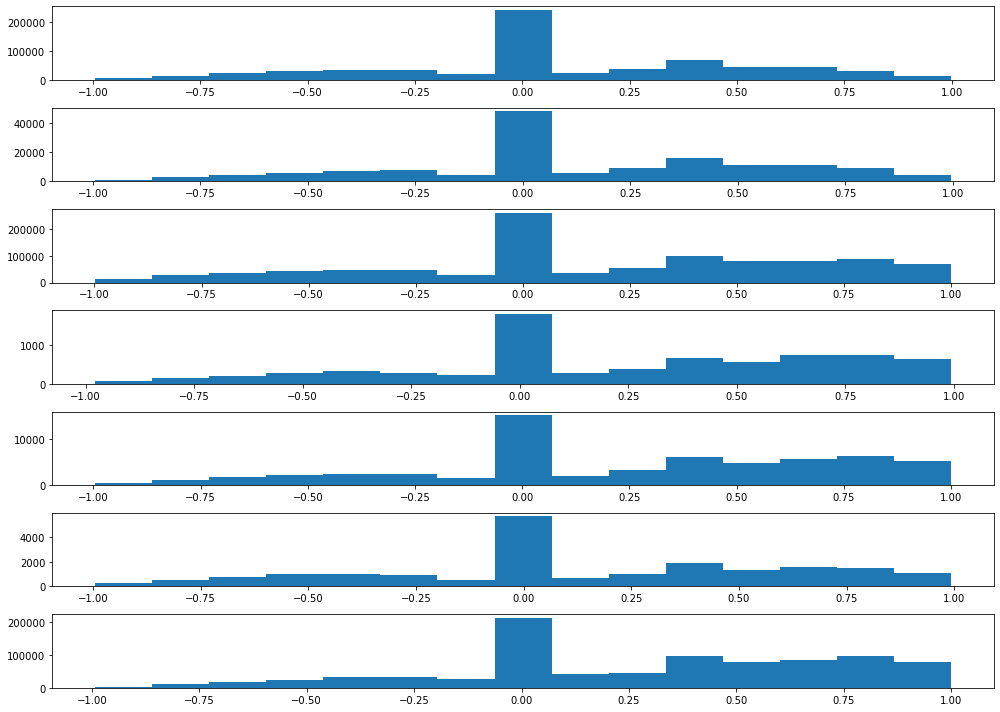

In [190]:
fig, ax = plt.subplots(7,1, figsize=(14,10))

ax[0].hist(nytimes.compound, bins=15)

ax[1].hist(wsj.compound, bins=15)

ax[2].hist(people.compound, bins = 15)

ax[3].hist(womansday.compound, bins = 15)

ax[4].hist(mtv.compound, bins = 15)

ax[5].hist(tmz.compound, bins = 15)

ax[6].hist(espn.compound, bins = 15)

fig.tight_layout()

plt.show()

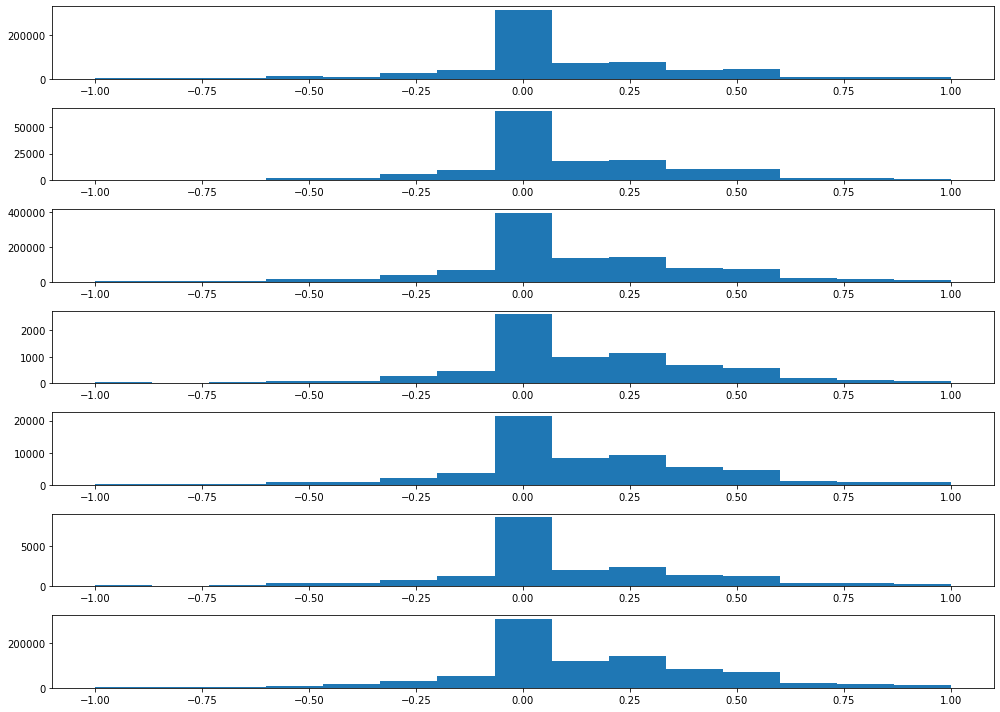

In [191]:
fig, ax = plt.subplots(7,1, figsize=(14,10))

ax[0].hist(nytimes.blob_polar, bins=15)

ax[1].hist(wsj.blob_polar, bins=15)

ax[2].hist(people.blob_polar, bins = 15)

ax[3].hist(womansday.blob_polar, bins = 15)

ax[4].hist(mtv.blob_polar, bins = 15)

ax[5].hist(tmz.blob_polar, bins = 15)

ax[6].hist(espn.blob_polar, bins = 15)

fig.tight_layout()

plt.show()

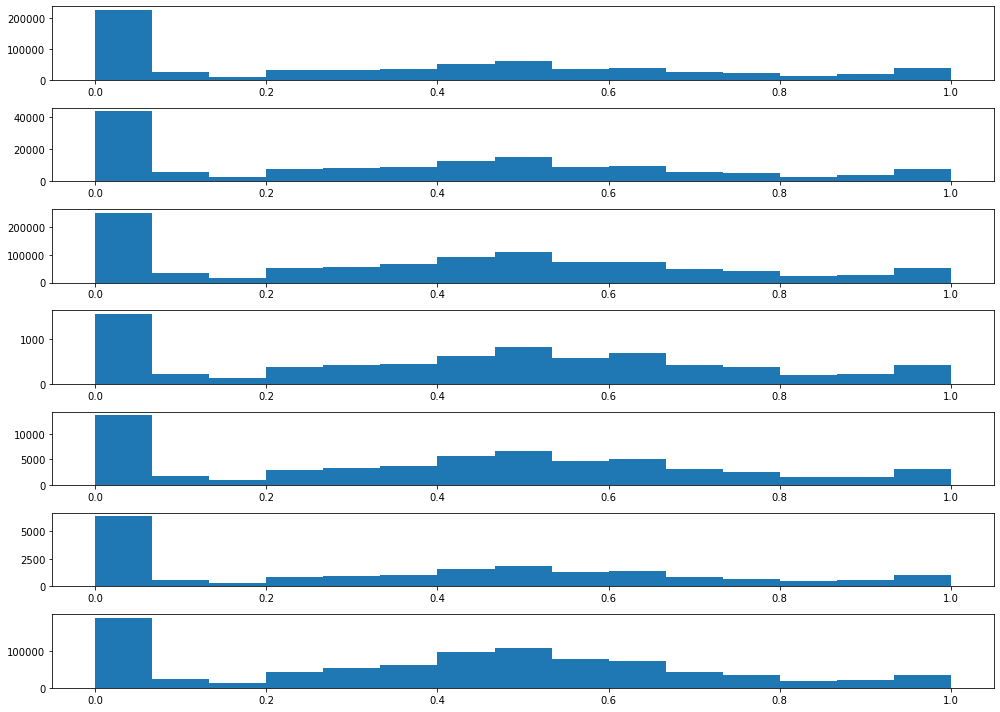

In [192]:
fig, ax = plt.subplots(7,1, figsize=(14,10))

ax[0].hist(nytimes.blob_subj, bins=15)

ax[1].hist(wsj.blob_subj, bins=15)

ax[2].hist(people.blob_subj, bins = 15)

ax[3].hist(womansday.blob_subj, bins = 15)

ax[4].hist(mtv.blob_subj, bins = 15)

ax[5].hist(tmz.blob_subj, bins = 15)

ax[6].hist(espn.blob_subj, bins = 15)

fig.tight_layout()

plt.show()

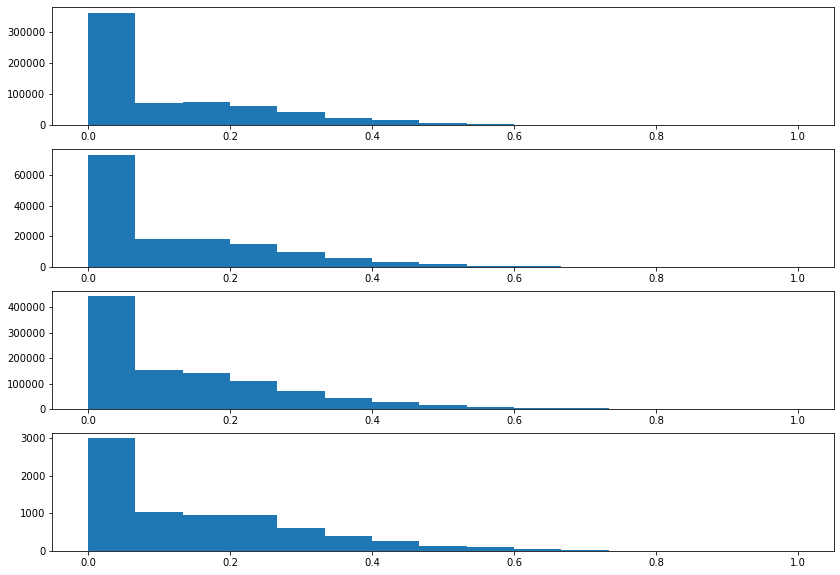

In [193]:
fig, ax = plt.subplots(4,1, figsize=(14,10))

ax[0].hist(nytimes.positive, bins=15)

ax[1].hist(wsj.positive, bins=15)

ax[2].hist(people.positive, bins = 15)

ax[3].hist(womansday.positive, bins = 15)

plt.show()

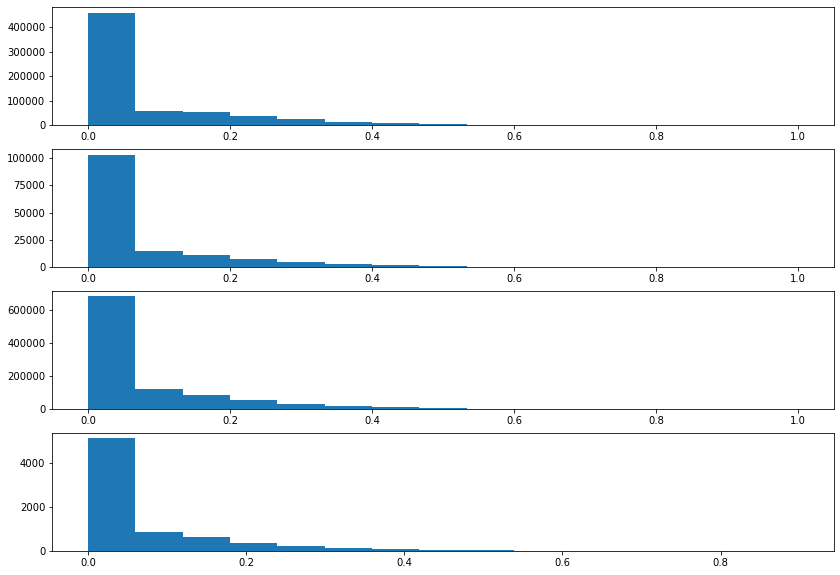

In [194]:
fig, ax = plt.subplots(4,1, figsize=(14,10))

ax[0].hist(nytimes.negative, bins=15)

ax[1].hist(wsj.negative, bins=15)

ax[2].hist(people.negative, bins = 15)

ax[3].hist(womansday.negative, bins = 15)

plt.show()

In [195]:
print(nytimes.compound.mean())
print(womansday.compound.mean())

0.08528024693197732
0.22793258081752665


In [247]:
media_outlets = ['nytimes', 'wsj', 'womansday', 'nbcnews', 'foxnews', 'aarp', 'usmagazine', 'espn', 'usatoday', 
'newstoday', 'sportingnews', 'theguardian', 'people', 'tmz', 'mtv', 'cnn', 'msn', 'reuters', 'timesrepublican', 
'nationalgeographic', 'latimes', 'washingtonpost', 'startribune', 'chicagotribune', 'usnews', 'theathletic', 
'rollingstone', 'vanityfair', 'intouchweekly', 'starmagazine', 'bbc', 'independent', 'thesun', 'thetimes',
'express', 'dailymail', 'mirror', 'economist']

newspapers = ['nytimes', 'wsj','foxnews', 'aarp','usatoday', 'newstoday', 'reuters', 'timesrepublican', 
'latimes', 'washingtonpost', 'startribune', 'cnn',  'chicagotribune', 'usnews', 'nbcnews', 'theguardian',
'bbc', 'independent', 'thesun', 'thetimes','express', 'dailymail', 'mirror', 'economist']

celebmagazines = ['womansday', 'usmagazine', 'people','tmz', 'intouchweekly', 'starmagazine']

other = ['mtv', 'msn','nationalgeographic', 'vanityfair', 'rollingstone']

sport = ['espn', 'sportingnews', 'theathletic']


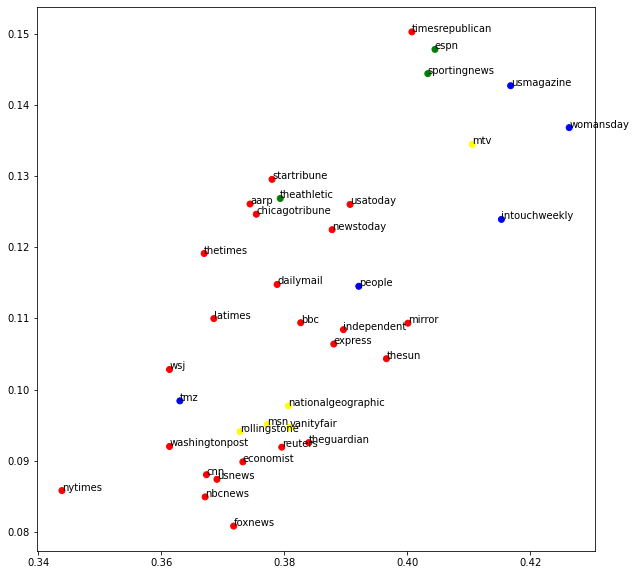

In [248]:
mean_polar = df.groupby(by = ['media_outlet'])['blob_polar'].mean()
mean_subj = df.groupby(by = ['media_outlet'])['blob_subj'].mean()


name = mean_polar.keys()

def pltcolor(lst):
    cols=[]
    for l in lst:
        if (l in newspapers):
            cols.append('red')
        elif (l in celebmagazines):
            cols.append('blue')
        elif (l in other):
            cols.append('yellow')
        else:
            cols.append('green')
    return cols
# Create the colors list using the function above
cols=pltcolor(mean_polar.keys())

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(mean_subj, mean_polar, c=cols)
for i, txt in enumerate(name):
    ax.annotate(txt, (mean_subj[i], mean_polar[i]))


In [213]:
a  = mean_polar.keys()
a

Index(['aarp', 'bbc', 'chicagotribune', 'cnn', 'dailymail', 'economist',
       'espn', 'express', 'foxnews', 'independent', 'intouchweekly', 'latimes',
       'mirror', 'msn', 'mtv', 'nationalgeographic', 'nbcnews', 'newstoday',
       'nytimes', 'people', 'reuters', 'rollingstone', 'sportingnews',
       'startribune', 'theathletic', 'theguardian', 'thesun', 'thetimes',
       'timesrepublican', 'tmz', 'usatoday', 'usmagazine', 'usnews',
       'vanityfair', 'washingtonpost', 'womansday', 'wsj'],
      dtype='object', name='media_outlet')

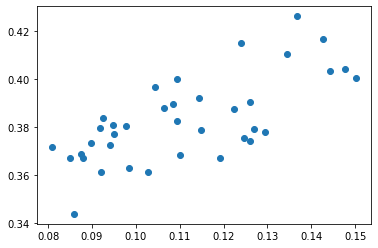

In [205]:
plt.scatter(mean_polar, mean_subj)

In [198]:
date = nytimes.groupby('date_short').positive.mean()

In [199]:
from datetime import datetime

def weekday_number(date):
  ''' Returning the weekday number of a date, e.g., 0 for Mondays.

  Parameters
  ----------
  date: datetime
    A datetime for which to find the weekday number.

  Returns
  -------
  weekday_number: int
    The weekday number of the date.
  '''

  weekday_number = date.weekday()
  return weekday_number


def weekday(date):
  ''' Returning the name of the weekday for a date.

  Parameters
  ----------
  date: datetime
    A datetime for which to find the weekday.

  Returns
  -------
  weekday: str
    The weekday of the date.
  '''
  
  day_number = date.weekday()
  week_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  weekday = week_days[day_number]
  return weekday


def week(date):
  ''' Returning the week number of a date.

  Parameters
  ----------
  date: datetime
    A datetime for which to find the weekday.

  Returns
  -------
  week_number: int
    The week number of the date.
  '''

  week_number = date.week()
  return week_number


def month(date):
  ''' Returning the month name of date.

  Parameters
  ----------
  date: datetime
    A date for which to find the month name.

  Returns
  -------
  name_month: str
    The name of the month.
  '''

  name_month = date.month_name()
  return name_month


def add_time(chunk):
  ''' Adding columns for weekday, weekday number and month name to a chunk.

  Parameters
  ----------
  chunk: dataframe
    The chunk for which to add date information.

  Returns
  -------
  chunk: dataframe
    The chunk with date information.
  '''

  chunk['date_short'] = chunk['date_short'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
  chunk['weekday_number'] = chunk['date_short'].apply(lambda x: weekday_number(x))  
  chunk['Month'] =  chunk['date_short'].apply(lambda x: month(x))
  return chunk

In [200]:
nytimes = add_time(nytimes)

In [201]:
nytimes.head()

,media_outlet,compound,positive,negative,blob_polar,blob_subj,date_short,weekday_number,Month
356,nytimes,-0.3612,0.000,0.294,0.0,0.0,2015-12-14,0,December
536,nytimes,0.1531,0.233,0.183,0.0,0.0,2015-10-02,4,October
627,nytimes,-0.6249,0.165,0.615,-0.9,0.7,2015-01-29,3,January
1239,nytimes,0.0000,0.000,0.000,0.2,0.4,2015-11-30,0,November
1434,nytimes,0.3612,0.455,0.000,0.0,0.0,2015-07-31,4,July


In [202]:
t, p = stats.ttest_ind(nytimes['compound'], wsj['compound'], equal_var=False)
print("Two sided paired t-test with null hypothesis: The mean mood in NYtimes equals the mean mood in Wall Street Journal:")
print(f"t-value: {t}, p-value: {p}")

Two sided paired t-test with null hypothesis: The mean mood in NYtimes equals the mean mood in Wall Street Journal:
t-value: -35.834473757551145, p-value: 2.1812370930100076e-280


In [203]:
day = nytimes.groupby('weekday_number').compound.mean()
month = nytimes.groupby('Month').compound.mean().reset_index()

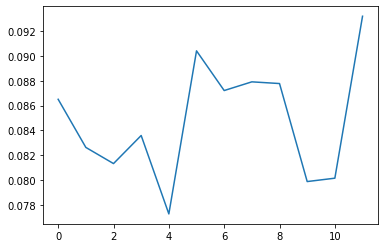

In [204]:
plt.plot(month['compound'])
